# Individual Assignment - Eduardo Razo

## Import needed packages to create credit scoring

In [1]:
# Data processing library
library(data.table)
library(varhandle)
library(stringr)
library(mlr)
install.packages('woeBinning')
library(woeBinning)  # Bin numerical and categorical variables
install.packages("readxl")
library(readxl)

# Machine learning library
library(MASS)  # LDA
library(randomForest)  # RF
library(gbm)  # Boosting Tree
library(xgboost)  # XGboost
install.packages("ada")
library(ada)
install.packages("e1071")
library(e1071)
install.packages("corrplot")
library(corrplot)
library(RColorBrewer)
install.packages("ggplot2")
library(ggplot2)
library(gtools)
install.packages("InformationValue")
library(InformationValue)

Warning message:
"package 'varhandle' was built under R version 3.6.2"Warning message:
"package 'mlr' was built under R version 3.6.3"Loading required package: ParamHelpers
Warning message:
"package 'ParamHelpers' was built under R version 3.6.3"'mlr' is in maintenance mode since July 2019. Future development
efforts will go into its successor 'mlr3' (<https://mlr3.mlr-org.com>).
Installing package into 'C:/Users/razow/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'woeBinning' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\razow\AppData\Local\Temp\RtmpE58cV5\downloaded_packages


Warning message:
"package 'Boruta' was built under R version 3.6.3"Loading required package: ranger
Warning message:
"package 'ranger' was built under R version 3.6.3"Installing package into 'C:/Users/razow/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'readxl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\razow\AppData\Local\Temp\RtmpE58cV5\downloaded_packages


Warning message:
"package 'readxl' was built under R version 3.6.3"Warning message:
"package 'MASS' was built under R version 3.6.3"Warning message:
"package 'randomForest' was built under R version 3.6.2"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ranger':

    importance

Warning message:
"package 'gbm' was built under R version 3.6.3"Loaded gbm 2.1.5
Warning message:
"package 'xgboost' was built under R version 3.6.3"Installing package into 'C:/Users/razow/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'ada' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\razow\AppData\Local\Temp\RtmpE58cV5\downloaded_packages


Warning message:
"package 'ada' was built under R version 3.6.3"Loading required package: rpart
Warning message:
"package 'rpart' was built under R version 3.6.3"Installing package into 'C:/Users/razow/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\razow\AppData\Local\Temp\RtmpE58cV5\downloaded_packages


Warning message:
"package 'e1071' was built under R version 3.6.3"
Attaching package: 'e1071'

The following object is masked from 'package:mlr':

    impute

Installing package into 'C:/Users/razow/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\razow\AppData\Local\Temp\RtmpE58cV5\downloaded_packages


Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded
Installing package into 'C:/Users/razow/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\razow\AppData\Local\Temp\RtmpE58cV5\downloaded_packages


Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin


Attaching package: 'gtools'

The following object is masked from 'package:e1071':

    permutations



## Reading data 

In [2]:
# Read accepts and rejects
accepts <- as.data.frame(read_excel('C:/Users/razow/Desktop/IESEG Subjects/15 Credit Scoring/Individual Assignment/Accepts.xlsx'))  # Accepts dataset
rejects <- as.data.frame(read_excel('C:/Users/razow/Desktop/IESEG Subjects/15 Credit Scoring/Individual Assignment/Rejects.xlsx'))  # Rejects data set without target variable

## Data exploration

Here we can have a general overview of the data. The following charts display the different variable types of the accepts and rejects datasets, also, it is possible to observe some descriptive analytics like mean, median, min and max corresponding to each variable. This overview helps to start getting an idea about potential data pre-processing. In this case, dealing with missing values and outliers.

In [3]:
# Strucuture of accepts dataset
str(accepts)

'data.frame':	10000 obs. of  19 variables:
 $ ID                 : num  250263 250290 250249 249516 249827 ...
 $ V1                 : num  1 1 2 3 1 1 2 1 2 3 ...
 $ V2                 : num  1 2 3 3 3 3 4 3 5 3 ...
 $ V3                 : num  11 6 11 10 5 11 11 12 11 14 ...
 $ V4                 : num  5 4 5 4 2 2 5 3 5 1 ...
 $ V5                 : num  6 5 7 2 4 5 7 3 1 4 ...
 $ V6                 : num  7 1 7 4 4 4 7 5 7 4 ...
 $ V7                 : num  1 1 1 1 1 3 3 1 1 3 ...
 $ V8                 : chr  "2" "2" "2" "2" ...
 $ Has_FICO           : num  0 1 1 0 0 0 1 0 0 0 ...
 $ Business_channel   : num  1 1 1 1 1 2 1 2 1 1 ...
 $ Days_late          : num  0 0 0 168 0 0 0 0 336 0 ...
 $ FICO_Score         : num  NA 1.498 -0.242 NA NA ...
 $ Loan_amount        : num  1.439 0.205 -0.853 -0.676 -0.412 ...
 $ Monthly_income     : num  -0.2591 0.3833 -0.7324 -0.0573 -0.5746 ...
 $ Age                : num  1.781 1.107 1.407 0.957 -0.39 ...
 $ Gearing_coefficient: num  0.86 -0.718 1

In [4]:
# Strucuture of rejects dataset
str(rejects)

'data.frame':	5000 obs. of  17 variables:
 $ ID                 : num  305932 305764 305971 305664 305639 ...
 $ V1                 : num  3 1 1 1 1 3 1 1 1 1 ...
 $ V2                 : num  3 4 4 5 4 3 5 3 4 3 ...
 $ V3                 : num  14 7 10 14 15 10 10 10 2 10 ...
 $ V4                 : num  2 1 4 2 1 1 4 4 2 4 ...
 $ V5                 : num  1 6 5 2 5 4 2 3 6 5 ...
 $ V6                 : num  5 4 4 5 4 5 4 4 4 4 ...
 $ V7                 : num  1 1 1 3 1 3 3 3 1 1 ...
 $ V8                 : chr  "1" "2" "4" "3" ...
 $ Has_FICO           : num  1 1 1 1 1 1 1 1 0 1 ...
 $ Business_channel   : num  1 1 3 1 2 1 1 1 1 3 ...
 $ FICO_Score         : num  -0.0305 0.7152 0.7649 -1.3478 1.6349 ...
 $ Loan_amount        : num  -0.324 5.668 -0.751 -0.853 3.201 ...
 $ Monthly_income     : num  -0.605 1.3 0.434 -0.49 0.561 ...
 $ Age                : num  -1.064 0.808 -0.39 -0.989 0.583 ...
 $ Gearing_coefficient: num  1.0282 1.0818 -0.9694 1.0463 0.0885 ...
 $ Max_gearing_ratio  : 

In [5]:
# Descriptive analytics of accepts dataset
summary(accepts)

       ID               V1              V2              V3        
 Min.   :249516   Min.   :1.000   Min.   :1.000   Min.   : 1.000  
 1st Qu.:269470   1st Qu.:1.000   1st Qu.:3.000   1st Qu.: 7.000  
 Median :284845   Median :1.000   Median :3.000   Median :10.000  
 Mean   :282248   Mean   :1.879   Mean   :3.495   Mean   : 9.041  
 3rd Qu.:296045   3rd Qu.:3.000   3rd Qu.:5.000   3rd Qu.:11.000  
 Max.   :305957   Max.   :5.000   Max.   :6.000   Max.   :16.000  
                                                                  
       V4              V5              V6              V7       
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:2.000   1st Qu.:4.000   1st Qu.:1.000  
 Median :4.000   Median :4.000   Median :5.000   Median :1.000  
 Mean   :3.316   Mean   :3.977   Mean   :4.868   Mean   :1.757  
 3rd Qu.:4.000   3rd Qu.:6.000   3rd Qu.:5.000   3rd Qu.:3.000  
 Max.   :6.000   Max.   :7.000   Max.   :7.000   Max.   :3.000  
         

In [6]:
# Descriptive analytics of rejects dataset
summary(rejects)

       ID               V1              V2              V3        
 Min.   :286878   Min.   :1.000   Min.   :1.000   Min.   : 1.000  
 1st Qu.:310661   1st Qu.:1.000   1st Qu.:3.000   1st Qu.: 5.000  
 Median :315932   Median :1.000   Median :4.000   Median :10.000  
 Mean   :315744   Mean   :1.864   Mean   :3.514   Mean   : 8.559  
 3rd Qu.:320834   3rd Qu.:3.000   3rd Qu.:5.000   3rd Qu.:11.000  
 Max.   :325624   Max.   :5.000   Max.   :5.000   Max.   :15.000  
                                                                  
       V4             V5              V6              V7       
 Min.   :1.00   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:2.00   1st Qu.:2.000   1st Qu.:4.000   1st Qu.:1.000  
 Median :4.00   Median :3.000   Median :5.000   Median :1.000  
 Mean   :3.21   Mean   :3.634   Mean   :4.698   Mean   :1.871  
 3rd Qu.:4.00   3rd Qu.:5.000   3rd Qu.:5.000   3rd Qu.:3.000  
 Max.   :5.00   Max.   :7.000   Max.   :7.000   Max.   :3.000  
                

There are 4472 missing values in variable FICO_Score.

In [7]:
# Checking missing values
apply(is.na(accepts), 2, sum)

ID                  V1                  V2                  V3 
                  0                   0                   0                   0 
                 V4                  V5                  V6                  V7 
                  0                   0                   0                   0 
                 V8            Has_FICO    Business_channel           Days_late 
                  0                   0                   0                   0 
         FICO_Score         Loan_amount      Monthly_income                 Age 
               4472                   0                   0                   0 
Gearing_coefficient   Max_gearing_ratio          Default_45 
                  0                   0                   0

Variable type transformation is needed according to the data description provided in the assignment document. Also, in this section, missing values are replaced with the mean value of the variable respectively.

In [8]:
# Tranform numerical variables that should be categorical in accepts dataset
accepts$ID = as.character(accepts$ID)
accepts$V1 = as.factor(accepts$V1)
accepts$V2 = as.factor(accepts$V2)
accepts$V3 = as.factor(accepts$V3)
accepts$V4 = as.factor(accepts$V4)
accepts$V5 = as.factor(accepts$V5)
accepts$V6 = as.factor(accepts$V6)
accepts$V7 = as.factor(accepts$V7)
accepts$V8 = as.character(accepts$V8)
accepts$V8[accepts$V8 == ">4" ] <- 5 # Replacing ">4" value with 5
accepts$V8 = as.factor(accepts$V8)
accepts$Business_channel = as.factor(accepts$Business_channel)

# Replacing missing values with the mean of the variable in accepts dataset
mean <- mean(accepts$FICO_Score, na.rm = TRUE)

for(i in 1:ncol(accepts)){
  accepts[is.na(accepts[,i]), i] <- mean
}

# Tranform numerical variables that should be categorical in rejects dataset
rejects$ID = as.character(rejects$ID)
rejects$V1 = as.factor(rejects$V1)
rejects$V2 = as.factor(rejects$V2)
rejects$V3 = as.factor(rejects$V3)
rejects$V4 = as.factor(rejects$V4)
rejects$V5 = as.factor(rejects$V5)
rejects$V6 = as.factor(rejects$V6)
rejects$V7 = as.factor(rejects$V7)
rejects$V8 = as.character(rejects$V8)
rejects$V8[rejects$V8 == ">4" ] <- 5 # Replacing ">4" value with 5
rejects$V8 = as.factor(rejects$V8)
rejects$Business_channel = as.factor(rejects$Business_channel)

# Replacing missing values with the mean of the variable in rejects dataset
mean1 <- mean(rejects$FICO_Score, na.rm = TRUE)

for(i in 1:ncol(rejects)){
  rejects[is.na(rejects[,i]), i] <- mean1
}

In the following two cells, it is possible to observe that there are no missing values anymore.

In [9]:
# Checking missing values in accepts
apply(is.na(accepts), 2, sum)

ID                  V1                  V2                  V3 
                  0                   0                   0                   0 
                 V4                  V5                  V6                  V7 
                  0                   0                   0                   0 
                 V8            Has_FICO    Business_channel           Days_late 
                  0                   0                   0                   0 
         FICO_Score         Loan_amount      Monthly_income                 Age 
                  0                   0                   0                   0 
Gearing_coefficient   Max_gearing_ratio          Default_45 
                  0                   0                   0

In [10]:
# Checking missing values in rejects
apply(is.na(rejects), 2, sum)

ID                  V1                  V2                  V3 
                  0                   0                   0                   0 
                 V4                  V5                  V6                  V7 
                  0                   0                   0                   0 
                 V8            Has_FICO    Business_channel          FICO_Score 
                  0                   0                   0                   0 
        Loan_amount      Monthly_income                 Age Gearing_coefficient 
                  0                   0                   0                   0 
  Max_gearing_ratio 
                  0

In [11]:
str(accepts)

'data.frame':	10000 obs. of  19 variables:
 $ ID                 : chr  "250263" "250290" "250249" "249516" ...
 $ V1                 : Factor w/ 5 levels "1","2","3","4",..: 1 1 2 3 1 1 2 1 2 3 ...
 $ V2                 : Factor w/ 6 levels "1","2","3","4",..: 1 2 3 3 3 3 4 3 5 3 ...
 $ V3                 : Factor w/ 16 levels "1","2","3","4",..: 11 6 11 10 5 11 11 12 11 14 ...
 $ V4                 : Factor w/ 6 levels "1","2","3","4",..: 5 4 5 4 2 2 5 3 5 1 ...
 $ V5                 : Factor w/ 7 levels "1","2","3","4",..: 6 5 7 2 4 5 7 3 1 4 ...
 $ V6                 : Factor w/ 7 levels "1","2","3","4",..: 7 1 7 4 4 4 7 5 7 4 ...
 $ V7                 : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 3 3 1 1 3 ...
 $ V8                 : Factor w/ 5 levels "1","2","3","4",..: 2 2 2 2 3 4 1 3 1 1 ...
 $ Has_FICO           : num  0 1 1 0 0 0 1 0 0 0 ...
 $ Business_channel   : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 2 1 2 1 1 ...
 $ Days_late          : num  0 0 0 168 0 0 0 0 336 0 ...


## Data visualization 

This chart helps to viasualize how the different numeric variables are correlated to the target variable Default_45. As we can see, Days_late has a very high correlation with Default_45, which is normal since default is defined based on the overdue days. From this, now there is a rational to drop this feature to avoid overfitting when training the model. 

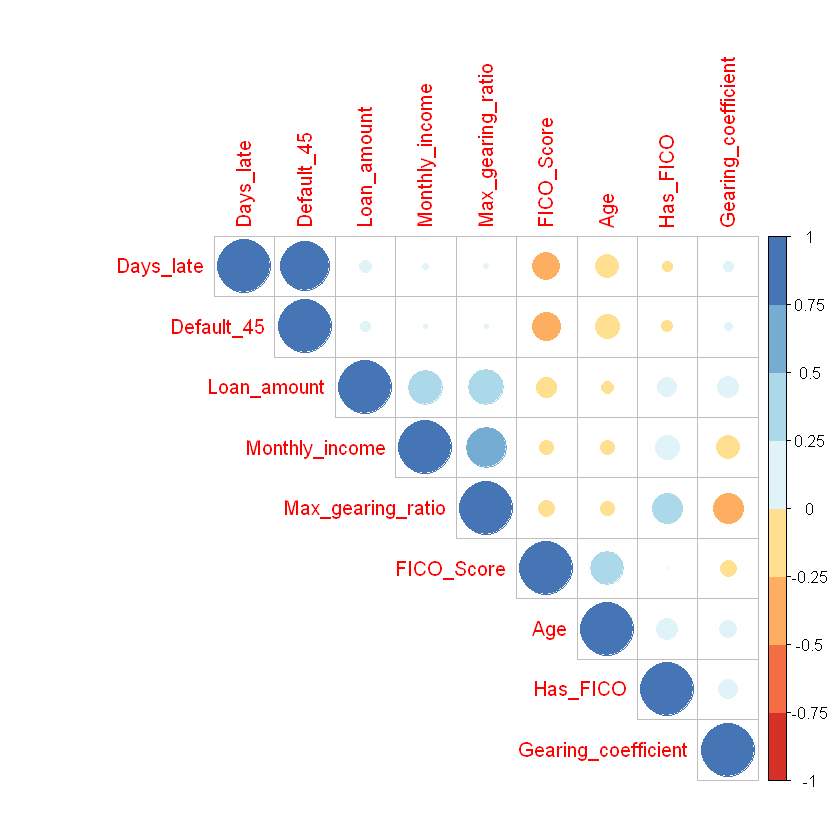

In [12]:
#First glance at the most important numeric variables (correlation with the target variable)
numericVars <- which(sapply(accepts, is.numeric)) #index vector numeric variables
numericVarNames <- names(numericVars)
all_numVar <- accepts[, numericVars]
M <-cor(all_numVar)
corrplot(M, type="upper", order="hclust",
         col=brewer.pal(n=8, name="RdYlBu"))

The following histograms and scatter plots correspond to numeric variables from accepts and rejects datasets.

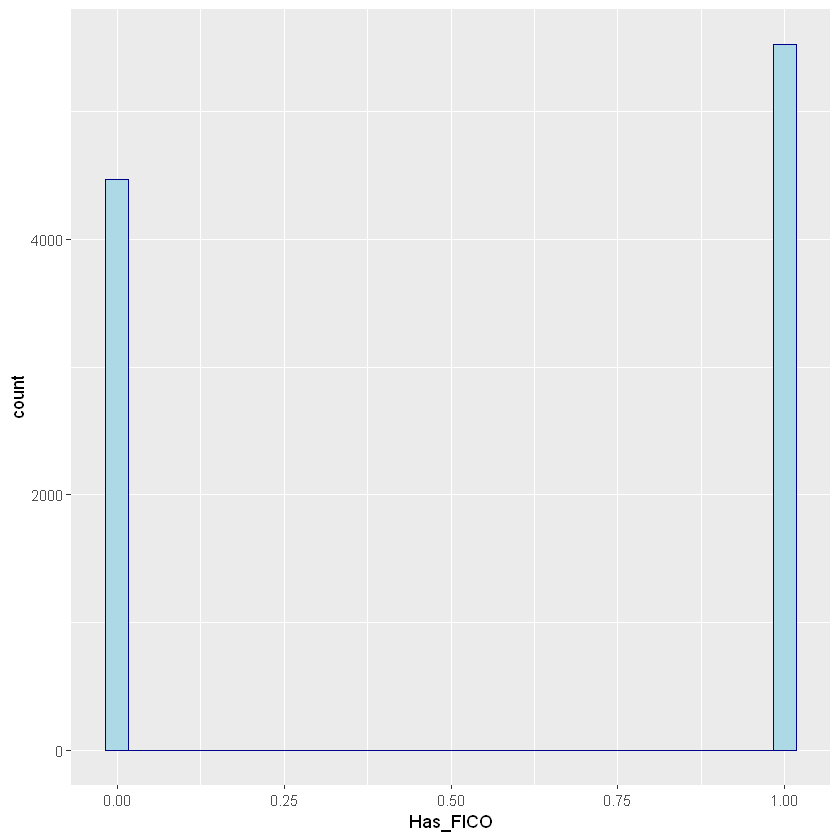

In [13]:
# Plotting Has_FICO
ggplot(accepts, aes(x=Has_FICO))+
  geom_histogram(color="darkblue", fill="lightblue", bins = 30)

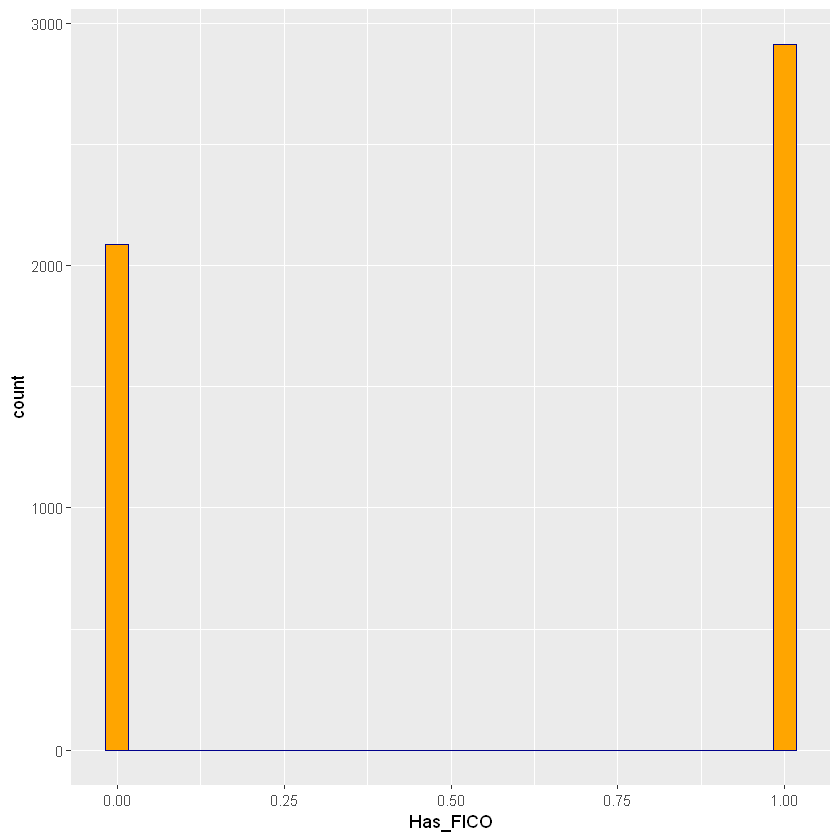

In [14]:
# Plotting Has_FICO
ggplot(rejects, aes(x=Has_FICO))+
  geom_histogram(color="darkblue", fill="orange", bins = 30)

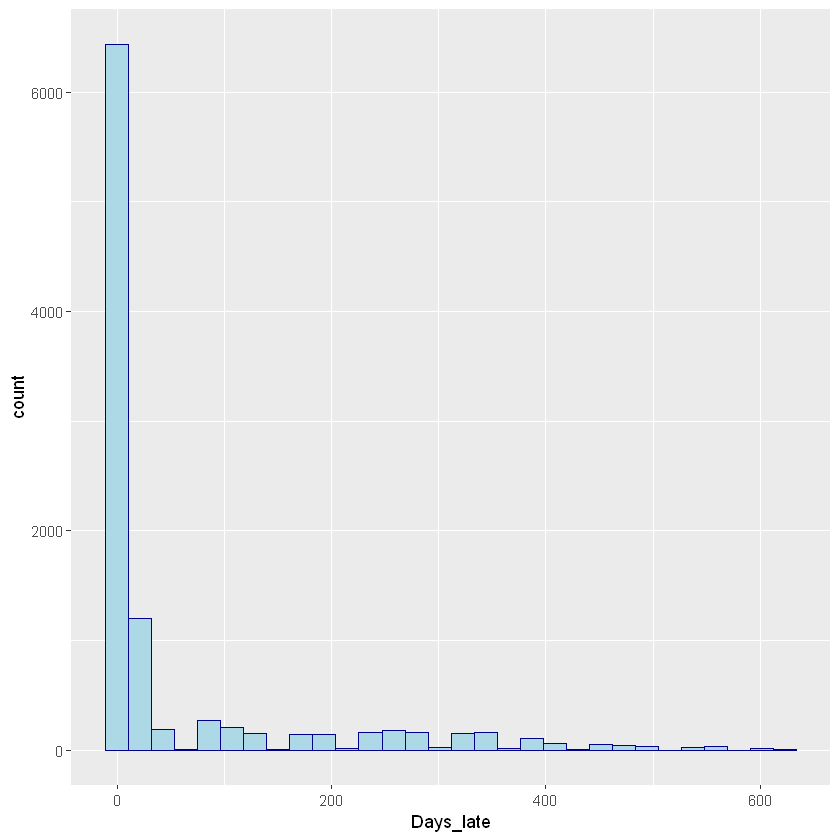

In [15]:
# Plotting Days_late
ggplot(accepts, aes(x=Days_late))+
  geom_histogram(color="darkblue", fill="lightblue", bins = 30)

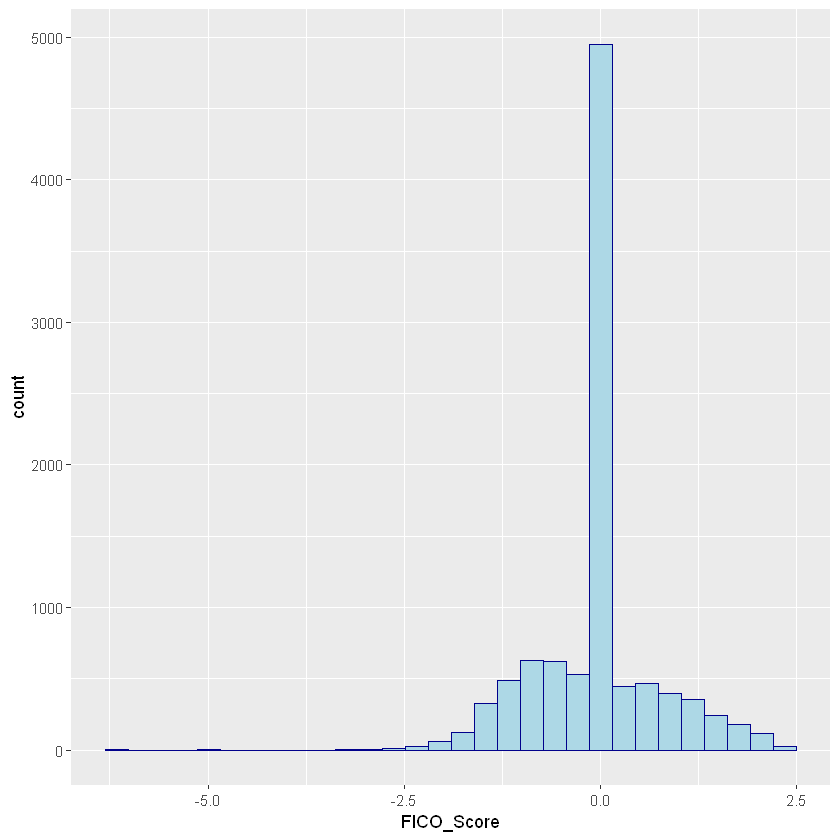

In [16]:
# Plotting FICO_Score
ggplot(accepts, aes(x=FICO_Score))+
  geom_histogram(color="darkblue", fill="lightblue", bins = 30)

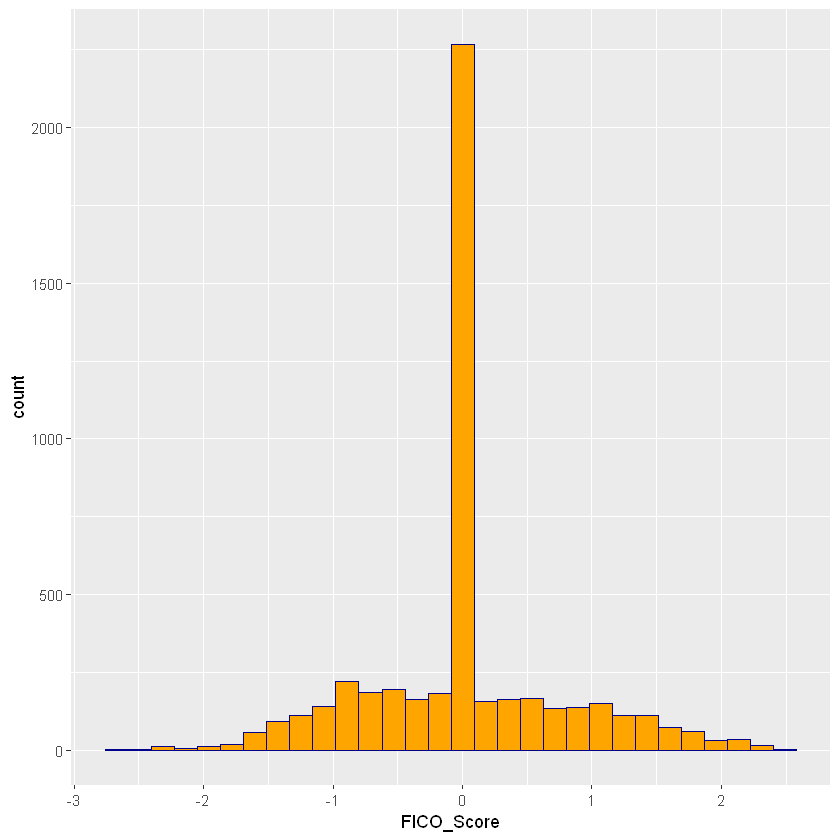

In [17]:
# Plotting FICO_Score
ggplot(rejects, aes(x=FICO_Score))+
  geom_histogram(color="darkblue", fill="orange", bins = 30)

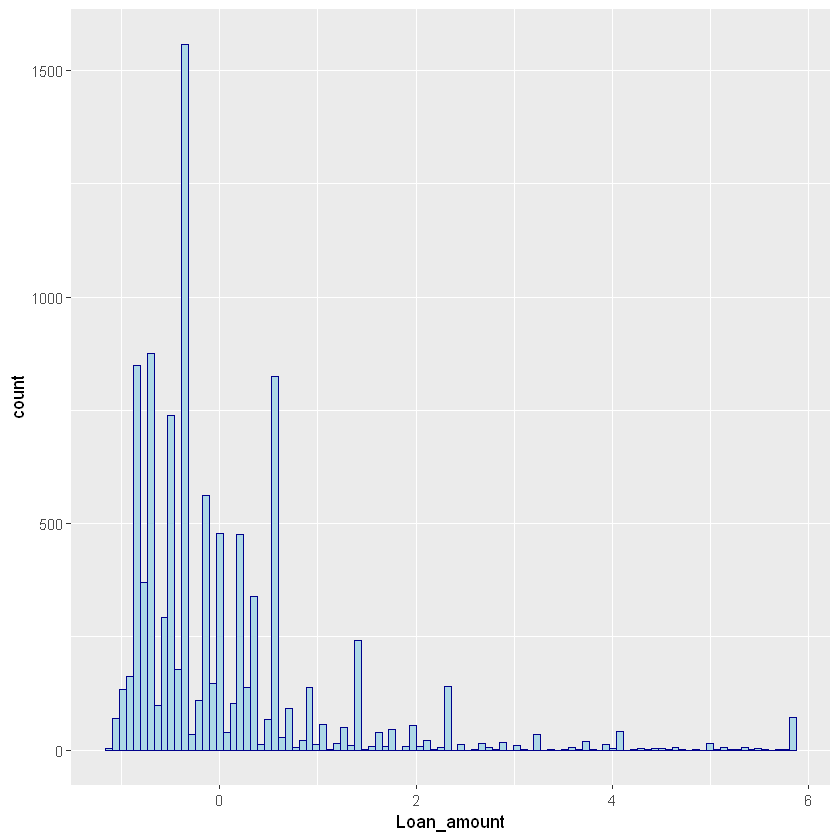

In [18]:
# Plotting Loan_amount
ggplot(accepts, aes(x=Loan_amount))+
  geom_histogram(color="darkblue", fill="lightblue", bins = 100)

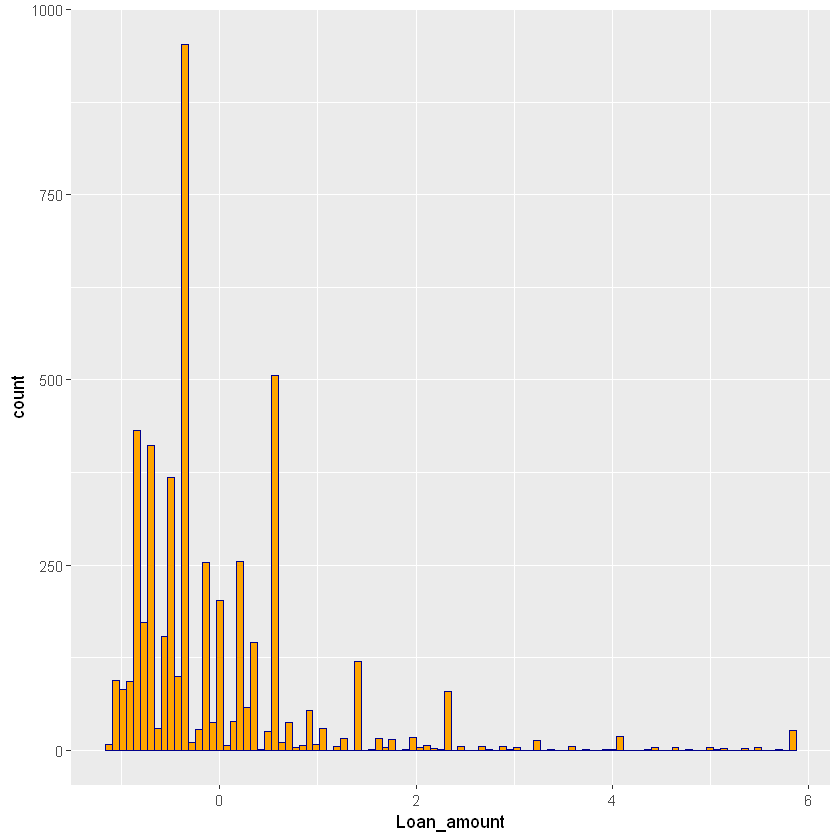

In [19]:
# Plotting Loan_amount
ggplot(rejects, aes(x=Loan_amount))+
  geom_histogram(color="darkblue", fill="orange", bins = 100)

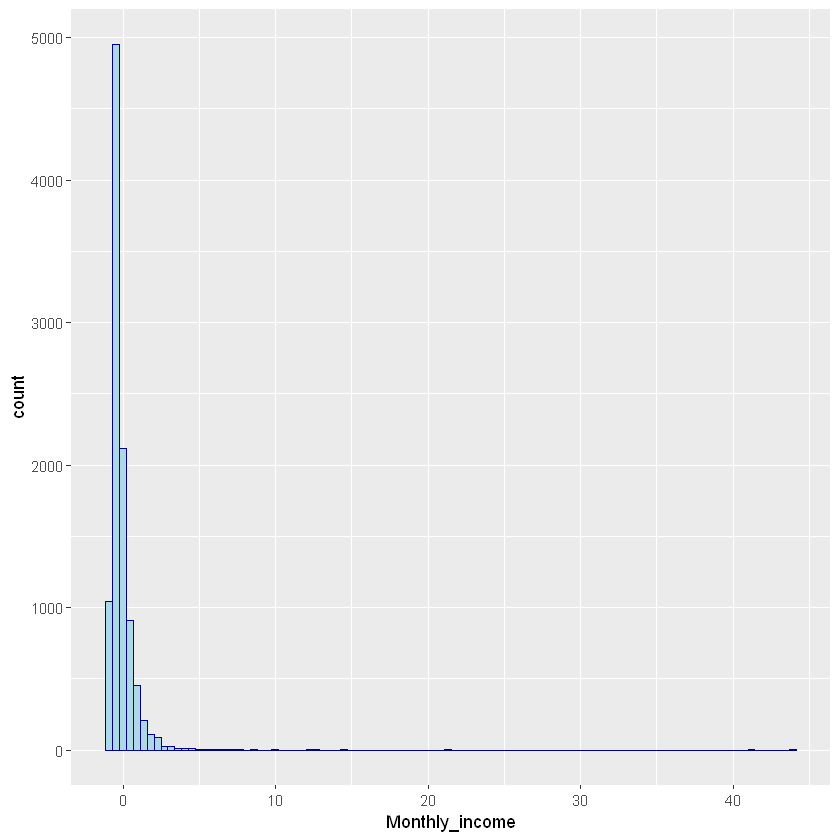

In [20]:
# Plotting Monthly_income
ggplot(accepts, aes(x=Monthly_income))+
  geom_histogram(color="darkblue", fill="lightblue", bins = 100)

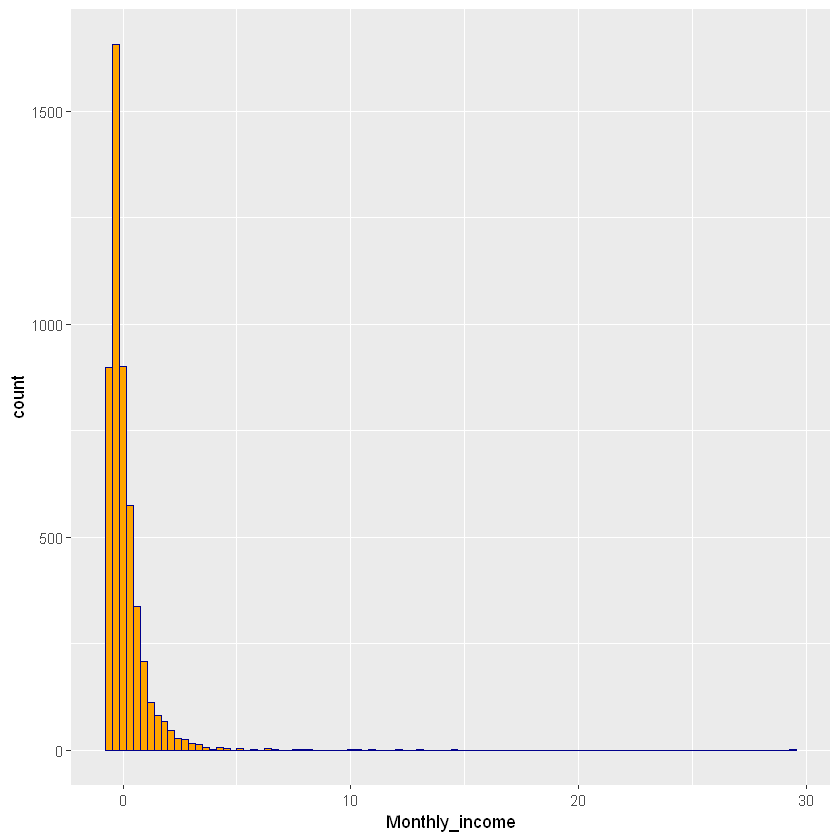

In [21]:
# Plotting Monthly_income
ggplot(rejects, aes(x=Monthly_income))+
  geom_histogram(color="darkblue", fill="orange", bins = 100)

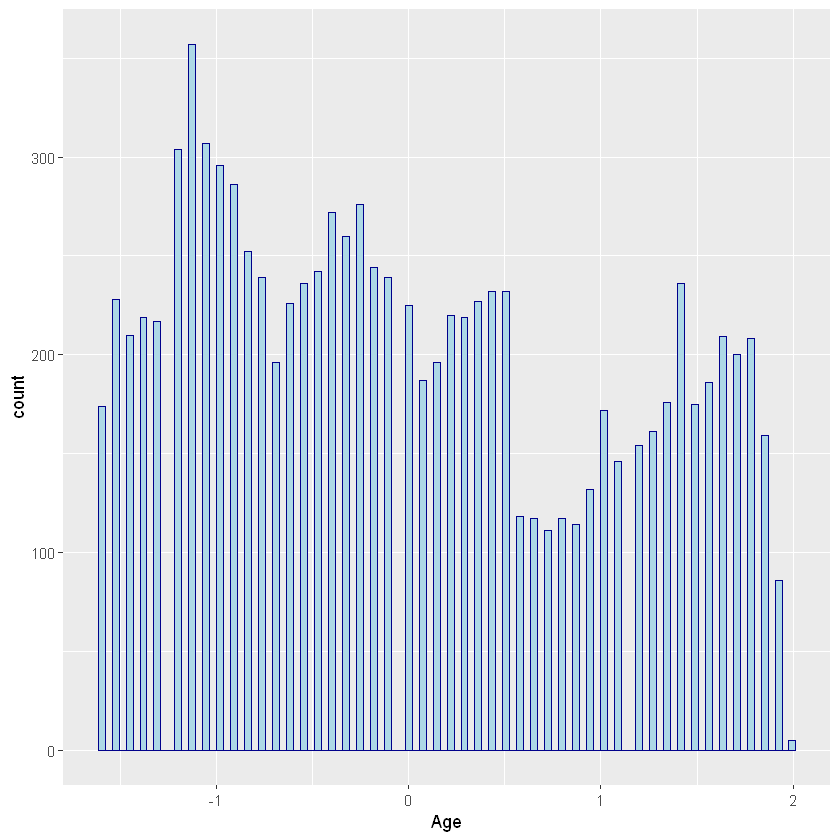

In [22]:
# Plotting Age
ggplot(accepts, aes(x=Age))+
  geom_histogram(color="darkblue", fill="lightblue", bins = 100)

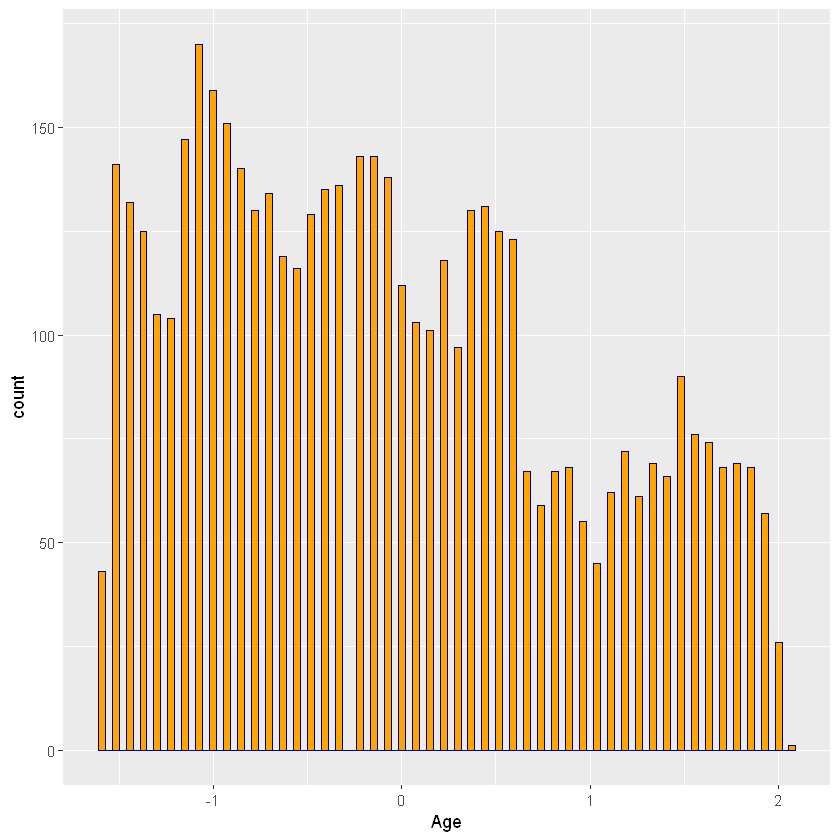

In [23]:
# Plotting Age
ggplot(rejects, aes(x=Age))+
  geom_histogram(color="darkblue", fill="orange", bins = 100)

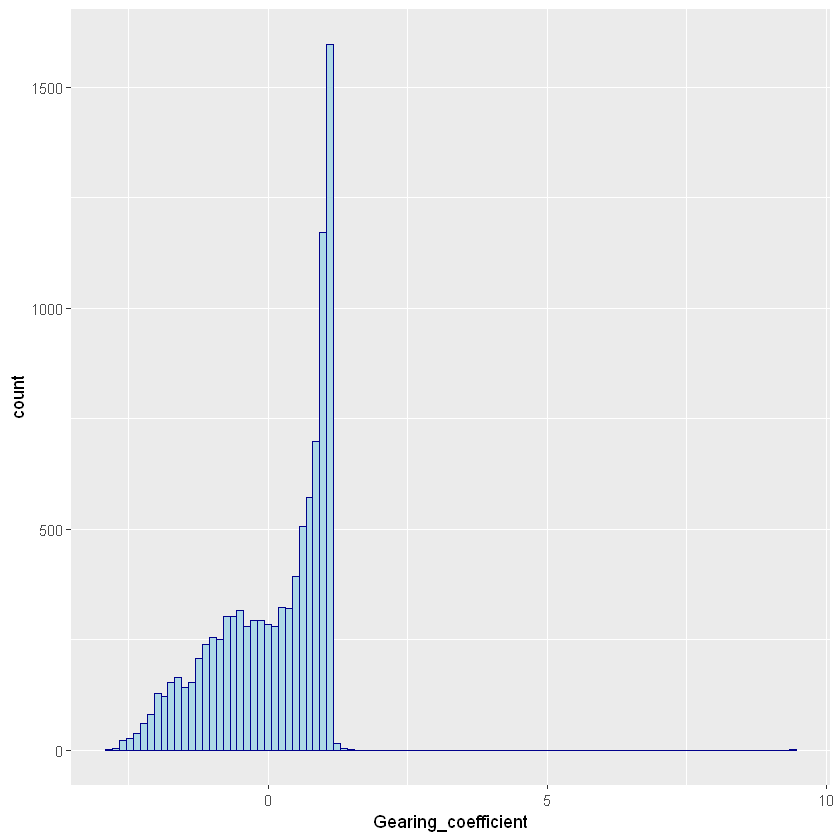

In [24]:
# Plotting Gearing_coefficient
ggplot(accepts, aes(x=Gearing_coefficient))+
  geom_histogram(color="darkblue", fill="lightblue", bins = 100)

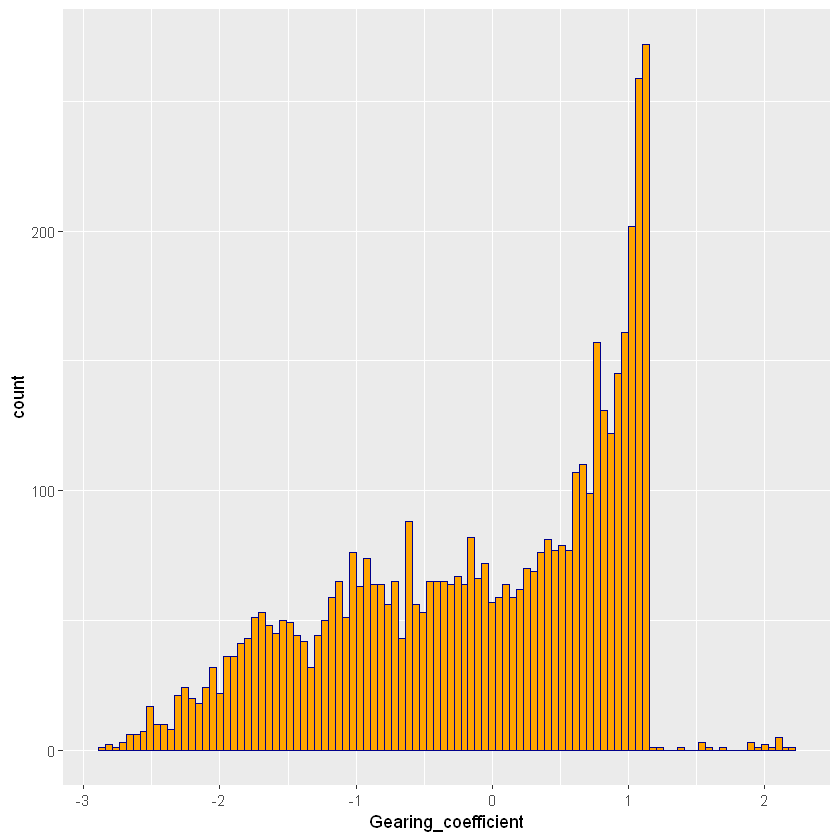

In [25]:
# Plotting Gearing_coefficient
ggplot(rejects, aes(x=Gearing_coefficient))+
  geom_histogram(color="darkblue", fill="orange", bins = 100)

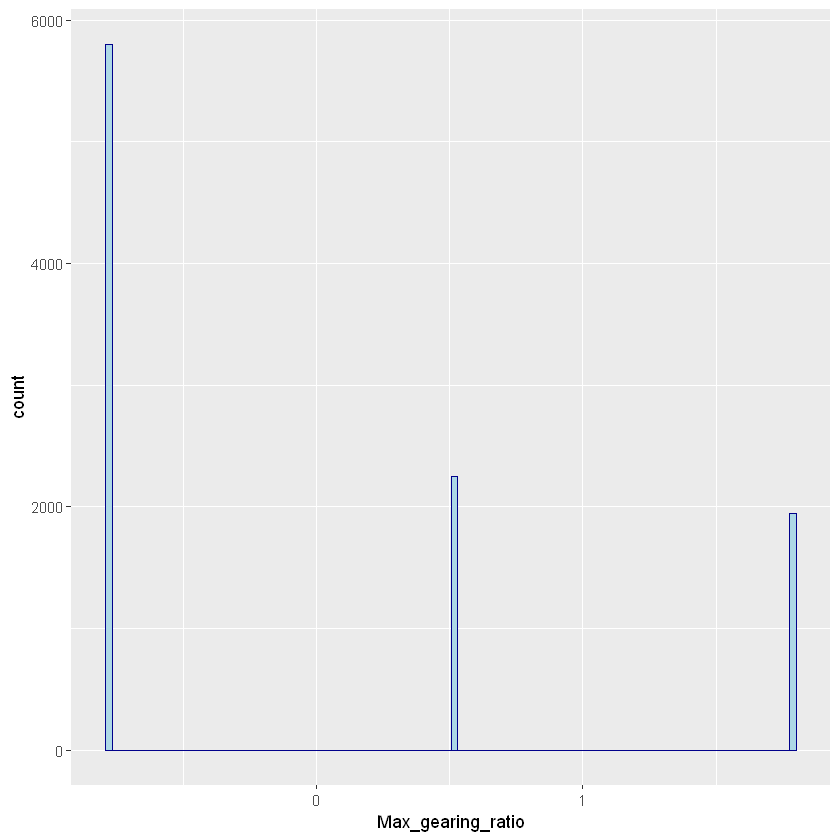

In [26]:
# Plotting Max_gearing_ratio
ggplot(accepts, aes(x=Max_gearing_ratio))+
  geom_histogram(color="darkblue", fill="lightblue", bins = 100)

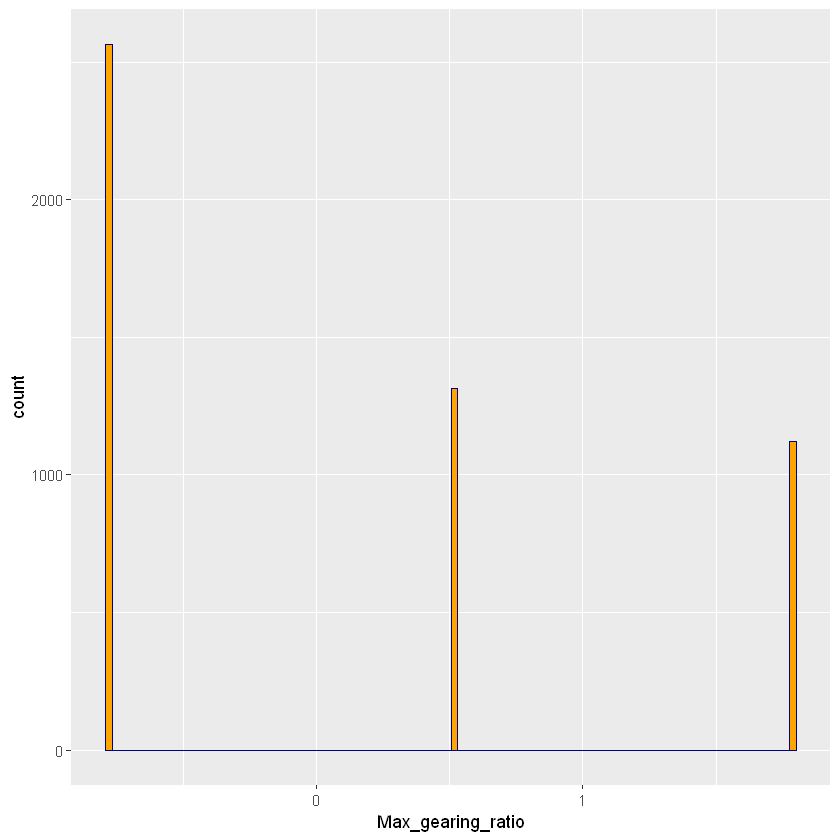

In [27]:
# Plotting Max_gearing_ratio
ggplot(rejects, aes(x=Max_gearing_ratio))+
  geom_histogram(color="darkblue", fill="orange", bins = 100)

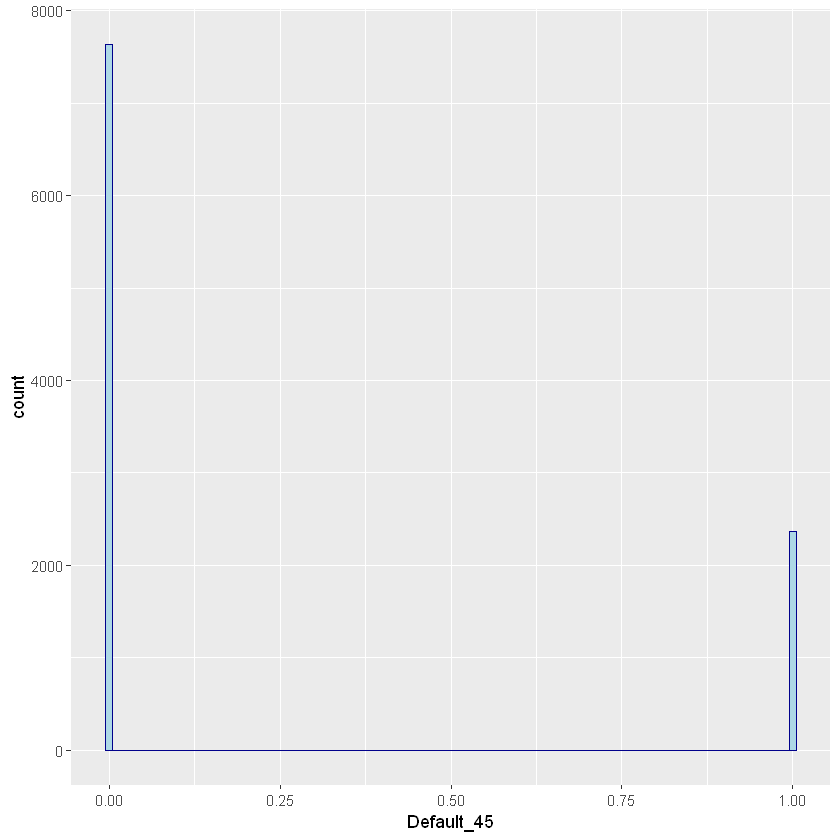

In [28]:
# Plotting Default_45
ggplot(accepts, aes(x=Default_45))+
  geom_histogram(color="darkblue", fill="lightblue", bins = 100)

From these scatter plots it is possible to identify the outliers in the variables Monthly_income, FICO_Score and Gearing_coefficient, however, these outliers are totally possible values and we only need to cap them off with the upper and lower limits depending on the direction of the value. That way, we can also avoid overfitting.

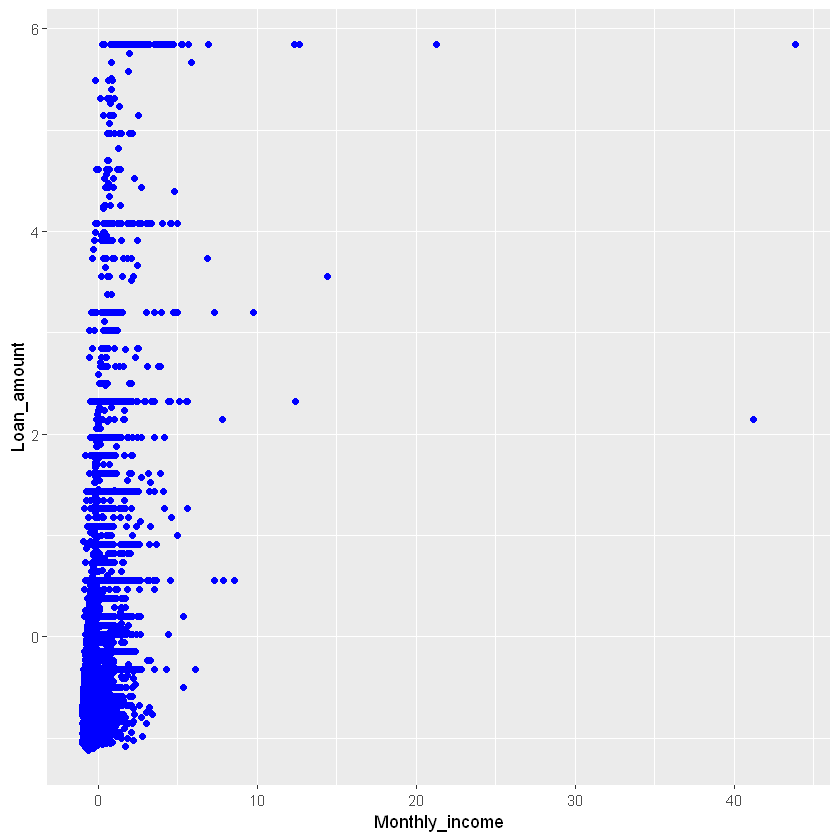

In [29]:
# Plotting Monthly_income
ggplot(accepts, aes(x=Monthly_income, y=Loan_amount)) + 
    geom_point(color = 'blue')

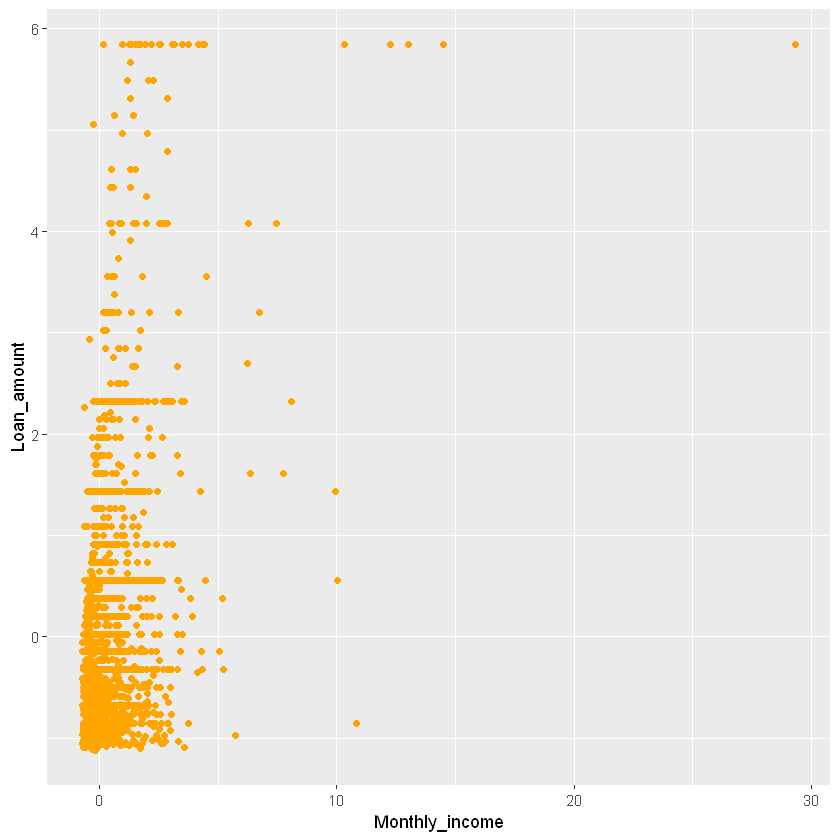

In [30]:
# Plotting Monthly_income
ggplot(rejects, aes(x=Monthly_income, y=Loan_amount)) + 
    geom_point(color = 'orange')

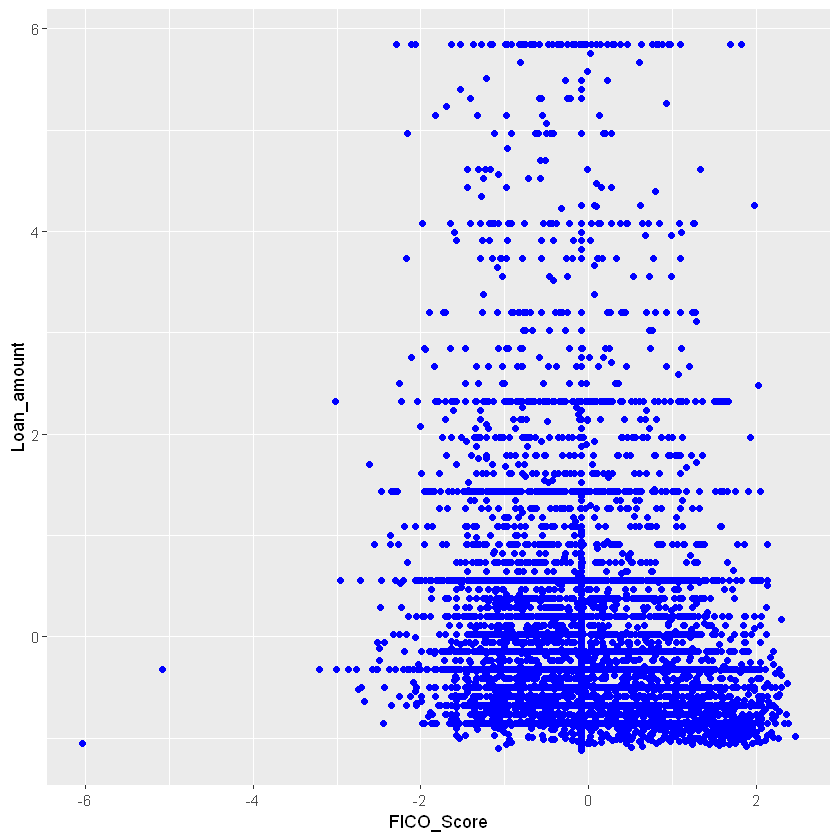

In [31]:
# Plotting FICO_Score
ggplot(accepts, aes(x=FICO_Score, y=Loan_amount)) + 
    geom_point(color = 'blue')

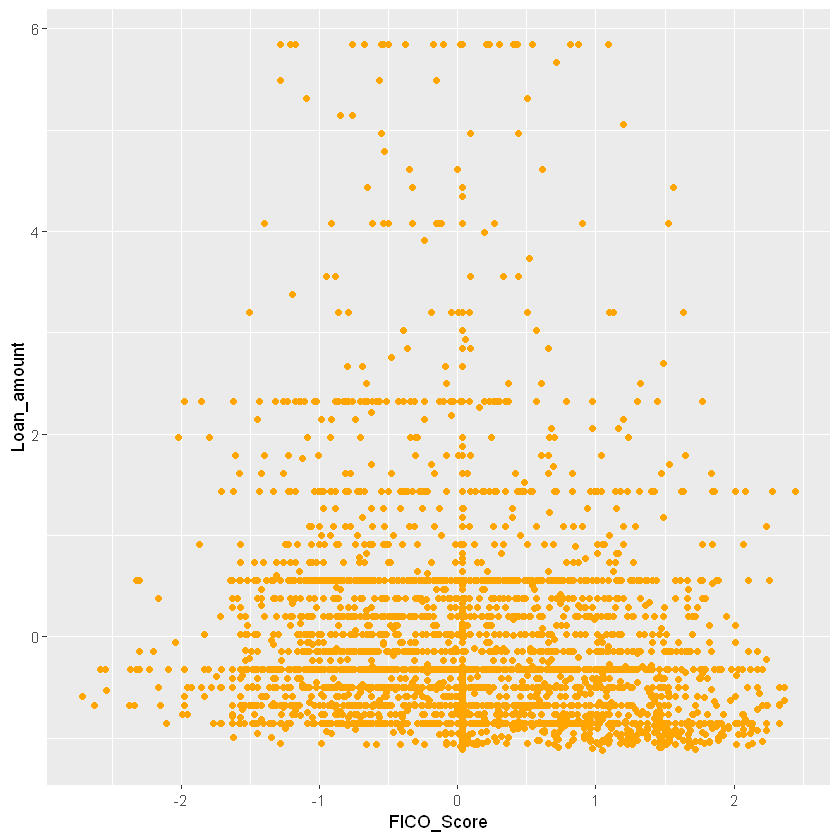

In [32]:
# Plotting FICO_Score
ggplot(rejects, aes(x=FICO_Score, y=Loan_amount)) + 
    geom_point(color = 'orange')

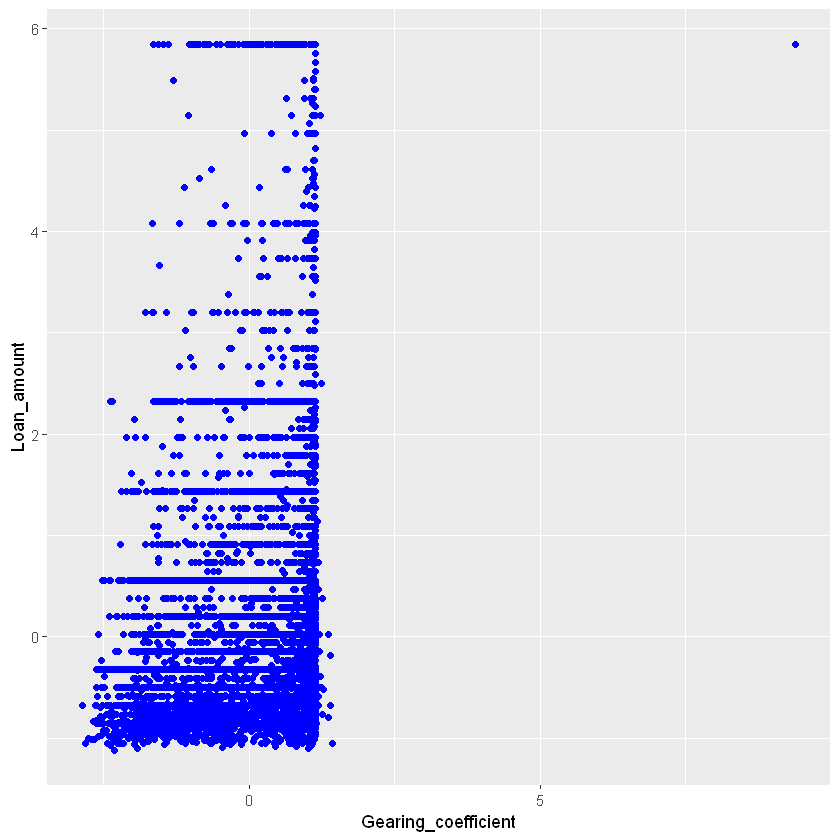

In [33]:
# Plotting Gearing_coefficient
ggplot(accepts, aes(x=Gearing_coefficient, y=Loan_amount)) + 
    geom_point(color = 'blue')

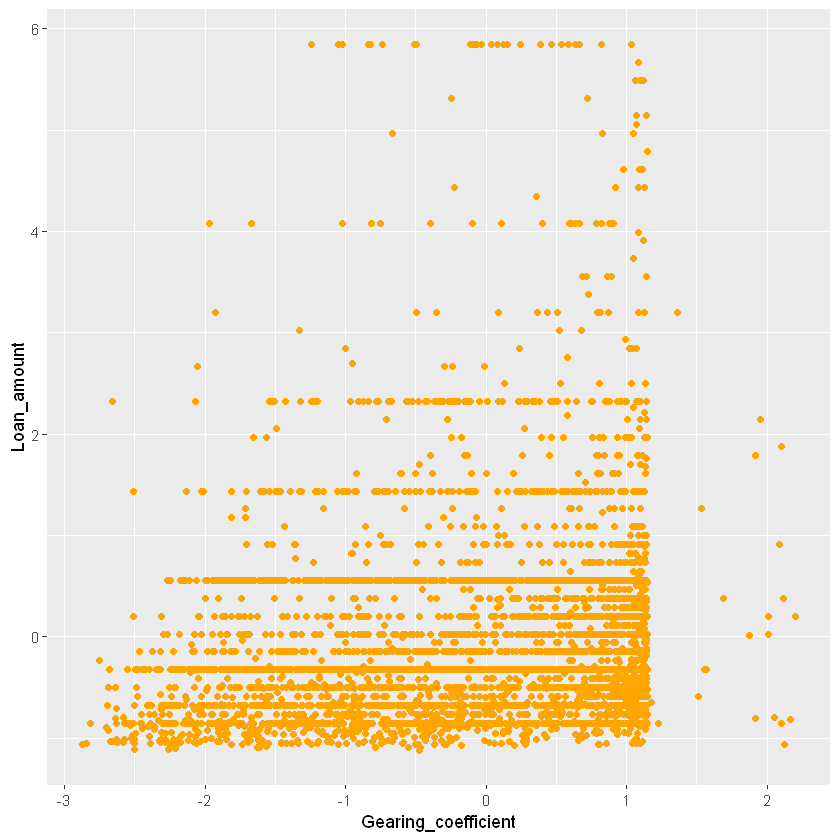

In [34]:
# Plotting Gearing_coefficient
ggplot(rejects, aes(x=Gearing_coefficient, y=Loan_amount)) + 
    geom_point(color = 'orange')

## Data processing 

### Removing outliers

As mentioned above it is necessary to hanle missing values identified. This is done by capping off the values with the upper and lower limits depending on the direction of the value. 

In [35]:
# Capping off the variables with outliers on accepts dataset
accepts$Monthly_income[accepts$Monthly_income > 30 ] <- 21.26570768 # Upper limit in the monthly income
accepts$FICO_Score[accepts$FICO_Score < -4 ] <- -3.21201108510482 # Lower limit in the monthly income
accepts$Gearing_coefficient[accepts$Gearing_coefficient > 3 ] <- 1.43795224603677 # Upper limit in the monthly income

# Capping off the variables with outliers on rejects dataset
rejects$Monthly_income[rejects$Monthly_income > 9 ] <- 8.08981639652218 # Upper limit in the monthly income

### WOE Binning 

In [36]:
# Applying WOE binning on accepts dataset
accepts1 <- accepts[-1]

binn <- woe.binning(accepts1, 'Default_45', accepts1)
binn

Days_late,"-920.965438503847 , 702.917388716383 , NA , -Inf , 15 , Inf , 15 , Inf , Missing , 16.2228240204374 , 16.2228240204374 , 16.2228240204374 , 0 , 2364 , 0 , 7630 , 6 , 0 , 9.99800039992002e-05, 0.999900019996001 , 0 , 0.999114425412456 , 0.000885574587544513, 0 , 9.20057776787277 , 7.02224625256458 , NA",16.22282
FICO_Score,"107.8222054522 , 1.48456966935542 , -187.464564086661 , NA , -Inf , -0.825844367005543 , 0.292671282103493 , Inf , -0.825844367005543 , 0.292671282103493 , Inf , Missing , 0.610070186380573 , 0.610070186380573 , 0.610070186380573 , 0.610070186380573 , 718 , 1556 , 90 , 0 , 789 , 4952 , 1895 , 0 , 0.303722504230118 , 0.658206429780034 , 0.0380710659898477 , 0 , 0.103326348873756 , 0.648507071765322 , 0.248166579360922 , 0 , 0.216071554346647 , 0.000143993727208603, 0.393854638306717 , NA",0.6100702
V5,"3.000000e+00, 3.000000e+00, 3.000000e+00, 3.000000e+00, 2.000000e+00, 1.000000e+00, 1.000000e+00, 4.000000e+00, 5.000000e+00, 6.000000e+00, 7.000000e+00, 3.000000e+00, 1.000000e+00, 2.000000e+00, -5.852487e+01, -5.852487e+01, -5.852487e+01, -5.852487e+01, 1.468755e+01, 6.422484e+01, 6.422484e+01, 3.022592e-01, 3.022592e-01, 3.022592e-01, 3.022592e-01, 3.022592e-01, 3.022592e-01, 3.022592e-01, 7.630000e+02, 7.630000e+02, 7.630000e+02, 7.630000e+02, 4.500000e+02, 1.151000e+03, 1.151000e+03, 4.425000e+03, 4.425000e+03, 4.425000e+03, 4.425000e+03, 1.255000e+03, 1.956000e+03, 1.956000e+03, 3.227580e-01, 3.227580e-01, 3.227580e-01, 3.227580e-01, 1.903553e-01, 4.868866e-01, 4.868866e-01, 5.794919e-01, 5.794919e-01, 5.794919e-01, 5.794919e-01, 1.643531e-01, 2.561551e-01, 2.561551e-01, 1.502532e-01, 1.502532e-01, 1.502532e-01, 1.502532e-01, 3.819097e-03, 1.481870e-01, 1.481870e-01",0.3022592
Business_channel,"3.00000000, 1.00000000, 2.00000000, 3.00000000, 1.00000000, 2.00000000, -116.67350903, -17.65752711, 76.58875173, 0.25969783, 0.25969783, 0.25969783, 83.00000000, 1424.00000000, 857.00000000, 861.00000000, 5488.00000000, 1287.00000000, 0.03510998, 0.60236887, 0.36252115, 0.11275537, 0.71870089, 0.16854374, 0.09059160, 0.02054136, 0.14856488",0.2596978
Age,"33.2694124103606 , -69.2481629144119 , NA , -Inf , 0.208659647290484 , Inf , 0.208659647290484 , Inf , Missing , 0.226070072545987 , 0.226070072545987 , 0.226070072545987 , 1842 , 522 , 0 , 4266 , 3370 , 0 , 0.779187817258883 , 0.220812182741117 , 0 , 0.558669460450498 , 0.441330539549502 , 0 , 0.0733651615671323, 0.152704910978855 , NA",0.2260701
V6,"1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 2.000000e+00, 3.000000e+00, 3.000000e+00, 1.000000e+00, 2.000000e+00, 3.000000e+00, 7.000000e+00, 4.000000e+00, 5.000000e+00, 6.000000e+00, -7.668060e+01, -7.668060e+01, -7.668060e+01, -7.668060e+01, -3.875125e+00, 4.370554e+01, 4.370554e+01, 2.228737e-01, 2.228737e-01, 2.228737e-01, 2.228737e-01, 2.228737e-01, 2.228737e-01, 2.228737e-01, 3.700000e+02, 3.700000e+02, 3.700000e+02, 3.700000e+02, 7.100000e+02, 1.284000e+03, 1.284000e+03, 2.573000e+03, 2.573000e+03, 2.573000e+03, 2.573000e+03, 2.384000e+03, 2.679000e+03, 2.679000e+03, 1.565144e-01, 1.565144e-01, 1.565144e-01, 1.565144e-01, 3.003384e-01, 5.431472e-01, 5.431472e-01, 3.369565e-01, 3.369565e-01, 3.369565e-01, 3.369565e-01, 3.122053e-01, 3.508381e-01, 3.508381e-01, 1.383641e-01, 1.383641e-01, 1.383641e-01, 1.383641e-01, 4.598585e-04, 8.404972e-02, 8.404972e-02",0.2228737
V1,"1.000000e+00, 1.000000e+00, 3.000000e+00, 2.000000e+00, 2.000000e+00, 1.000000e+00, 2.000000e+00, 4.000000e+00, 3.000000e+00, 5.000000e+00, -3.323366e+01, -3.323366e+01, 6.275102e+00, 5.647705e+01, 5.647705e+01, 1.681591e-01, 1.681591e-01, 1.681591e-01, 1.681591e-01, 1.681591e-01, 1.142000e+03, 1.142000e+03, 2.080000e+02, 1.014000e+03, 1.014000e+03, 5.143000e+03, 5.143000e+03, 6.310000e+02, 1.862000e+03, 1.862000e+03, 4.830795e-01, 4.830795e-01, 8.798646e-02, 4.289340e-01, 4.289340e-01, 6.735202e-01, 6.735202e-01, 8.263489e-02, 2.438449e-01, 2.438449e-01, 6.329040e-02, 6.329040e-02, 3.358169e-04, 1.045328e-01, 1.045328e-0

### Deployment of WOE binning on accepts dataset 

As mentioned in the course and taking into consideration the weights of evidence obtained, we drop those that have an importance value (IV) less that 0.02 since they do not have a strong influence on the target variable. In additon, it is necessary to remove Days_late due to the high correlation with the dependant variable and therefore, the strong IV.

Weights of evidence should also be applied on rejects dataset.

It is worth mentioning that original variables (non-binned) have to be removed from the final datasets to avoid multicolinearity. The process is described below. 

In [37]:
# Applying the binning to the accepts data
accepts_proce <- woe.binning.deploy(accepts, binn, min.iv.total=0.02)

# Dropping unbinned variables and also those that do not have a high Information Value or does not make sense
accepts_proce <- subset(accepts_proce, select = -c(V1, V2, V3, V4, V5, V6, V7, V8, Has_FICO, Business_channel,
                 Days_late, FICO_Score, Loan_amount, Monthly_income, Age, Gearing_coefficient, Max_gearing_ratio, Days_late.binned))

In [38]:
str(accepts_proce)

'data.frame':	10000 obs. of  15 variables:
 $ ID                     : chr  "250263" "250290" "250249" "249516" ...
 $ Default_45             : num  0 0 0 1 0 0 0 0 1 0 ...
 $ FICO_Score.binned      : Factor w/ 4 levels "(-Inf,-0.825844367]",..: 2 3 2 2 2 2 3 2 2 2 ...
 $ V5.binned              : Factor w/ 4 levels "1 + 2","3","4 + 5 + 6 + 7",..: 3 3 3 1 3 3 3 2 1 3 ...
 $ Business_channel.binned: Factor w/ 4 levels "1","2","3","unknown": 1 1 1 1 1 2 1 2 1 1 ...
 $ Age.binned             : Factor w/ 3 levels "(-Inf,0.2086596473]",..: 2 2 2 2 1 1 2 1 2 1 ...
 $ V6.binned              : Factor w/ 4 levels "misc. level neg. + 7",..: 1 1 1 2 2 2 1 3 1 2 ...
 $ V1.binned              : Factor w/ 4 levels "1 + 2","misc. level pos. + 3",..: 1 1 1 2 1 1 1 1 1 2 ...
 $ V4.binned              : Factor w/ 4 levels "1","misc. level pos. + 4 + 3 + 2",..: 3 2 3 2 2 2 3 2 3 1 ...
 $ V3.binned              : Factor w/ 4 levels "11 + misc. level neg.",..: 1 3 1 3 1 1 1 1 1 3 ...
 $ V7.binned           

### Deployment of WOE binning on rejects dataset 

In [39]:
# Create a blank response column on rejects to be able to apply WOE binning
rejects$Days_late <- 0

# Applying the binning to the rejects dataset
rejects_proce <- woe.binning.deploy(rejects, binn, min.iv.total=0.02)

# Dropping unbinned variables and also those that do not have a high Information Value or does not make sense
rejects_proce <- subset(rejects_proce, select = -c(V1, V2, V3, V4, V5, V6, V7, V8, Has_FICO, Business_channel,
               FICO_Score, Loan_amount, Monthly_income, Age, Gearing_coefficient, Max_gearing_ratio, Days_late, Days_late.binned))

In [40]:
str(rejects_proce)

'data.frame':	5000 obs. of  14 variables:
 $ ID                     : chr  "305932" "305764" "305971" "305664" ...
 $ FICO_Score.binned      : Factor w/ 4 levels "(-Inf,-0.825844367]",..: 2 3 3 1 3 3 2 2 2 3 ...
 $ V5.binned              : Factor w/ 4 levels "1 + 2","3","4 + 5 + 6 + 7",..: 1 3 3 1 3 3 1 2 3 3 ...
 $ Business_channel.binned: Factor w/ 4 levels "1","2","3","unknown": 1 1 3 1 2 1 1 1 1 3 ...
 $ Age.binned             : Factor w/ 3 levels "(-Inf,0.2086596473]",..: 1 2 1 1 2 1 1 1 2 2 ...
 $ V6.binned              : Factor w/ 4 levels "misc. level neg. + 7",..: 3 2 2 3 2 3 2 2 2 2 ...
 $ V1.binned              : Factor w/ 4 levels "1 + 2","misc. level pos. + 3",..: 2 1 1 1 1 2 1 1 1 1 ...
 $ V4.binned              : Factor w/ 4 levels "1","misc. level pos. + 4 + 3 + 2",..: 2 1 2 2 1 1 2 2 2 2 ...
 $ V3.binned              : Factor w/ 4 levels "11 + misc. level neg.",..: 3 1 3 3 3 3 3 3 2 3 ...
 $ V7.binned              : Factor w/ 4 levels "1","misc. level pos.",..: 1 1 1 3

In [41]:
# Rename the data columns
# accepts_proce
for (v in colnames(accepts_proce)) {
    fix_name <- str_replace_all(v, "[^[:alnum:] ]", "_")
    colnames(accepts_proce)[colnames(accepts_proce) == v] <- fix_name
}
# Test (holdout)
for (v in colnames(rejects_proce)) {
    fix_name <- str_replace_all(v, "[^[:alnum:] ]", "_")
    colnames(rejects_proce)[colnames(rejects_proce) == v] <- fix_name
}

accepts_proce$Default_45 = as.factor(accepts_proce$Default_45)

## Modeling

In this section of the notebook, the purpose is to train and test 3 different models to obtain the credit scorecard. The models used are Decision trees, Ada Boosting and Logsitic Regression. The 3 models were trained and tested using Cross Validation with 200 iterations, being Logistic Regression the one with the best performance with an aggregated AUC of 0.7735.

After selecting the best learner, probabilities of default were estimated applying the predict() function on the rejects dataset.   

### Decision trees 

In [43]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=200, predict="both")

# Define the model
learner <- makeLearner("classif.rpart", predict.type="prob", fix.factors.prediction=T)

# Define the task
train_task <- makeClassifTask(id="accepts_proce", data=accepts_proce[, -1], target="Default_45")

# Set hyper parameter tuning
tune_params <- makeParamSet(
)
ctrl = makeTuneControlGrid()

# Run the hyper parameter tuning with k-fold CV
if (length(tune_params$pars) > 0) {
    # Run parameter tuning
    res <- tuneParams(learner, task=train_task, resampling=rdesc,
      par.set=tune_params, control=ctrl, measures=list(mlr::auc))
    
    # Extract best model
    best_learner <- res$learner
    
} else {
    # Simple cross-validation
    res <- resample(learner, train_task, rdesc, measures=list(mlr::auc, setAggregation(mlr::auc, train.mean)))
    
    # No parameter for tuning, only 1 best learner
    best_learner <- learner
}

Warning message in makeTask(type = type, data = data, weights = weights, blocking = blocking, :
"Empty factor levels were dropped for columns: FICO_Score_binned,V5_binned,Business_channel_binned,Age_binned,V6_binned,V1_binned,V4_binned,V3_binned,V7_binned,V8_binned,V2_binned,Loan_amount_binned,Monthly_income_binned"Resampling: cross-validation
Measures:             auc.train   auc.test    
[Resample] iter 1:    0.6029199   0.6212500   
[Resample] iter 2:    0.6031258   0.5793651   
[Resample] iter 3:    0.6026070   0.6808732   
[Resample] iter 4:    0.6031430   0.5416667   
[Resample] iter 5:    0.6030654   0.5952381   
[Resample] iter 6:    0.6035691   0.4787500   
[Resample] iter 7:    0.6029908   0.6000000   
[Resample] iter 8:    0.6029752   0.6205357   
[Resample] iter 9:    0.6029670   0.6129386   
[Resample] iter 10:   0.6023446   0.7412587   
[Resample] iter 11:   0.6028164   0.6111111   
[Resample] iter 12:   0.6019831   0.7378472   
[Resample] iter 13:   0.6028285   0.6351351

[Resample] iter 167:  0.6030203   0.5997807   
[Resample] iter 168:  0.6030808   0.5862471   
[Resample] iter 169:  0.6038684   0.4230769   
[Resample] iter 170:  0.6030946   0.5904366   
[Resample] iter 171:  0.6034284   0.5270270   
[Resample] iter 172:  0.6027771   0.6363636   
[Resample] iter 173:  0.6029182   0.6102431   
[Resample] iter 174:  0.6032906   0.5216802   
[Resample] iter 175:  0.6028779   0.6275000   
[Resample] iter 176:  0.6030935   0.5841996   
[Resample] iter 177:  0.6027157   0.6559252   
[Resample] iter 178:  0.6025440   0.6871102   
[Resample] iter 179:  0.6029996   0.6102431   
[Resample] iter 180:  0.6034372   0.5338542   
[Resample] iter 181:  0.6033227   0.5508021   
[Resample] iter 182:  0.6035910   0.4712500   
[Resample] iter 183:  0.6029870   0.6096491   
[Resample] iter 184:  0.6036143   0.4186047   
[Resample] iter 185:  0.6028330   0.6309771   
[Resample] iter 186:  0.6032535   0.5475000   
[Resample] iter 187:  0.6033367   0.5542857   
[Resample] it

### Ada Boosting 

In [44]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=200, predict="both")

# Define the model
learner <- makeLearner("classif.ada", predict.type="prob", fix.factors.prediction=T)

# Define the task
train_task <- makeClassifTask(id="accepts_proce", data=accepts_proce[, -1], target="Default_45")

# Set hyper parameter tuning
tune_params <- makeParamSet(
)
ctrl = makeTuneControlGrid()

# Run the hyper parameter tuning with k-fold CV
if (length(tune_params$pars) > 0) {
    # Run parameter tuning
    res <- tuneParams(learner, task=train_task, resampling=rdesc,
      par.set=tune_params, control=ctrl, measures=list(mlr::auc))
    
    # Extract best model
    best_learner <- res$learner
    
} else {
    # Simple cross-validation
    res <- resample(learner, train_task, rdesc, measures=list(mlr::auc, setAggregation(mlr::auc, train.mean)))
    
    # No parameter for tuning, only 1 best learner
    best_learner <- learner
}

Warning message in makeTask(type = type, data = data, weights = weights, blocking = blocking, :
"Empty factor levels were dropped for columns: FICO_Score_binned,V5_binned,Business_channel_binned,Age_binned,V6_binned,V1_binned,V4_binned,V3_binned,V7_binned,V8_binned,V2_binned,Loan_amount_binned,Monthly_income_binned"Resampling: cross-validation
Measures:             auc.train   auc.test    
[Resample] iter 1:    0.7804981   0.6578947   
[Resample] iter 2:    0.7817239   0.7698413   
[Resample] iter 3:    0.7810469   0.7047817   
[Resample] iter 4:    0.7806629   0.7051282   
[Resample] iter 5:    0.7800831   0.7972028   
[Resample] iter 6:    0.7800314   0.8452381   
[Resample] iter 7:    0.7786048   0.8601190   
[Resample] iter 8:    0.7805279   0.6547619   
[Resample] iter 9:    0.7806017   0.8928571   
[Resample] iter 10:   0.7805690   0.6952381   
[Resample] iter 11:   0.7800044   0.7529138   
[Resample] iter 12:   0.7790906   0.7954545   
[Resample] iter 13:   0.7798428   0.6825000

[Resample] iter 167:  0.7795247   0.8511905   
[Resample] iter 168:  0.7797054   0.8247619   
[Resample] iter 169:  0.7805962   0.6902287   
[Resample] iter 170:  0.7790625   0.8711019   
[Resample] iter 171:  0.7792775   0.7885714   
[Resample] iter 172:  0.7794620   0.8650794   
[Resample] iter 173:  0.7797772   0.8536585   
[Resample] iter 174:  0.7803152   0.7408088   
[Resample] iter 175:  0.7801734   0.7095238   
[Resample] iter 176:  0.7808479   0.6686508   
[Resample] iter 177:  0.7789838   0.8245614   
[Resample] iter 178:  0.7807959   0.6652807   
[Resample] iter 179:  0.7797614   0.7318087   
[Resample] iter 180:  0.7795793   0.8898129   
[Resample] iter 181:  0.7793864   0.8694639   
[Resample] iter 182:  0.7798184   0.8674242   
[Resample] iter 183:  0.7805474   0.7950089   
[Resample] iter 184:  0.7818930   0.6765873   
[Resample] iter 185:  0.7784806   0.8175000   
[Resample] iter 186:  0.7788528   0.7842262   
[Resample] iter 187:  0.7807620   0.6562500   
[Resample] it

### Logistic Regression 

In [45]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=200, predict="both")

# Define the model
learner <- makeLearner("classif.logreg", predict.type="prob", fix.factors.prediction=T)

# Define the task
train_task <- makeClassifTask(id="accepts_proce", data=accepts_proce[, -1], target="Default_45")

# Set hyper parameter tuning
tune_params <- makeParamSet(
)
ctrl = makeTuneControlGrid()

# Run the hyper parameter tuning with k-fold CV
if (length(tune_params$pars) > 0) {
    # Run parameter tuning
    res <- tuneParams(learner, task=train_task, resampling=rdesc,
      par.set=tune_params, control=ctrl, measures=list(mlr::auc))
    
    # Extract best model
    best_learner <- res$learner
    
} else {
    # Simple cross-validation
    res <- resample(learner, train_task, rdesc, measures=list(mlr::auc, setAggregation(mlr::auc, train.mean)))
    
    # No parameter for tuning, only 1 best learner
    best_learner <- learner
}

Warning message in makeTask(type = type, data = data, weights = weights, blocking = blocking, :
"Empty factor levels were dropped for columns: FICO_Score_binned,V5_binned,Business_channel_binned,Age_binned,V6_binned,V1_binned,V4_binned,V3_binned,V7_binned,V8_binned,V2_binned,Loan_amount_binned,Monthly_income_binned"Resampling: cross-validation
Measures:             auc.train   auc.test    
[Resample] iter 1:    0.7776789   0.8161765   
[Resample] iter 2:    0.7782822   0.7258772   
[Resample] iter 3:    0.7775635   0.8531746   
[Resample] iter 4:    0.7780710   0.7763158   
[Resample] iter 5:    0.7780992   0.7692308   
[Resample] iter 6:    0.7780911   0.7525988   
[Resample] iter 7:    0.7777468   0.8019048   
[Resample] iter 8:    0.7782788   0.7167832   
[Resample] iter 9:    0.7781818   0.7261905   
[Resample] iter 10:   0.7784276   0.6756757   
[Resample] iter 11:   0.7778523   0.8070175   
[Resample] iter 12:   0.7773185   0.9349593   
[Resample] iter 13:   0.7782923   0.7149123

[Resample] iter 167:  0.7774343   0.8861789   
[Resample] iter 168:  0.7780808   0.7500000   
[Resample] iter 169:  0.7779570   0.7658730   
[Resample] iter 170:  0.7779986   0.7647059   
[Resample] iter 171:  0.7775683   0.8438095   
[Resample] iter 172:  0.7775861   0.8675000   
[Resample] iter 173:  0.7778627   0.7827381   
[Resample] iter 174:  0.7784376   0.6825000   
[Resample] iter 175:  0.7777601   0.8373984   
[Resample] iter 176:  0.7777558   0.8075000   
[Resample] iter 177:  0.7776608   0.9280303   
[Resample] iter 178:  0.7777948   0.8026316   
[Resample] iter 179:  0.7780263   0.7925408   
[Resample] iter 180:  0.7779088   0.8018648   
[Resample] iter 181:  0.7784474   0.6759907   
[Resample] iter 182:  0.7775904   0.8621324   
[Resample] iter 183:  0.7776849   0.8452381   
[Resample] iter 184:  0.7788789   0.4223485   
[Resample] iter 185:  0.7786252   0.6448413   
[Resample] iter 186:  0.7777273   0.8033088   
[Resample] iter 187:  0.7774671   0.8859649   
[Resample] it

In [46]:
# Retrain the model with tbe best hyper-parameters
best_md <- mlr::train(best_learner, train_task)

In [47]:
# Make prediction on test data
pred <- predict(best_md, newdata=rejects_proce[, -1])
pred

Prediction: 5000 observations
predict.type: prob
threshold: 0=0.50,1=0.50
time: 0.01
     prob.0     prob.1 response
1 0.6009948 0.39900522        0
2 0.9843564 0.01564363        0
3 0.9774504 0.02254959        0
4 0.3693418 0.63065824        1
5 0.9480154 0.05198463        0
6 0.9323074 0.06769259        0
... (#rows: 5000, #cols: 3)

Once the the probabilities of default for the rejects dataset has been estimated in the previous step (prob.1), it is necessary to calculate a probability threshold in order to be able to define the class od each client, in this case, 1 = Default and 0 = No Default.

Assuming that we want to have a 20% of rejection from new clients, we obtain the cutoff probability by using quantile() function, which gives us a cutoff of 0.3531. From this, now we are able to obtain the label (Default or No Default) for the customer in rejects dataset. 

In [54]:
# Defining a cutoff based on 20% rejection credit strategy  
cutoff <- quantile(pred$data$prob.1, 0.8)
cutoff

# Creating target variable (Default_45)
Default_45 <- ifelse(pred$data$prob.1 > cutoff, 1, 0)

# Stacking rejects dataset with target variable (Default_45) created in the previous step
rejects_label <- cbind(rejects_proce, Default_45)

80% 
0.3531278

In [55]:
# Verifying column names in both datasets
colnames(rejects_label)
colnames(accepts_proce)

[1] "ID"                      "FICO_Score_binned"      
 [3] "V5_binned"               "Business_channel_binned"
 [5] "Age_binned"              "V6_binned"              
 [7] "V1_binned"               "V4_binned"              
 [9] "V3_binned"               "V7_binned"              
[11] "V8_binned"               "V2_binned"              
[13] "Loan_amount_binned"      "Monthly_income_binned"  
[15] "Default_45"

[1] "ID"                      "Default_45"             
 [3] "FICO_Score_binned"       "V5_binned"              
 [5] "Business_channel_binned" "Age_binned"             
 [7] "V6_binned"               "V1_binned"              
 [9] "V4_binned"               "V3_binned"              
[11] "V7_binned"               "V8_binned"              
[13] "V2_binned"               "Loan_amount_binned"     
[15] "Monthly_income_binned"

## Rejection Inference 

Before training the model on the new dataset, a partition in train and test set is made with the accepts dataset. The steps are described in the next two cells.

After obtaining the labels in the rejects dataset, Rejection Inference is deployed by stacking accepts train dataset from accepts with rejects dataset. This is done with the purpose of getting a more robust model and improving the ability of identification of defaulters by incorporating rejected customers with an estimated credit behavior.

In [59]:
# Set seed and create assignment 
set.seed(1)
assignment <- sample(1:2, size = nrow(accepts_proce), prob = c(0.7, 0.30), replace = TRUE)

# Creating a train and test from the original dataframe 
accepts_train <- accepts_proce[assignment == 1, ]  # subset to training indices only
accepts_test <- accepts_proce[assignment == 2, ]   # subset to test indices only

In [64]:
# Stacking both datasets (accepts_train and rejects with default label) 
full <- rbind(rejects_label, accepts_train)
head(full)

,ID,FICO_Score_binned,V5_binned,Business_channel_binned,Age_binned,V6_binned,V1_binned,V4_binned,V3_binned,V7_binned,V8_binned,V2_binned,Loan_amount_binned,Monthly_income_binned,Default_45
,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
1,305932,"(-0.825844367,0.2926712821]",1 + 2,1,"(-Inf,0.2086596473]",misc. level pos. + 5,misc. level pos. + 3,misc. level pos. + 4 + 3 + 2,3 + 10 + misc. level pos.,1,1 + misc. level pos.,5 + 3,"(-0.6764073512,-0.323919846]","(-0.6873490569,-0.4157392887]",1
2,305764,"(0.2926712821, Inf]",4 + 5 + 6 + 7,1,"(0.2086596473, Inf]",4,1 + 2,1,11 + misc. level neg.,1,3 + 2,4,"(0.02856765915, Inf]","(-0.4157392887, Inf]",0
3,305971,"(0.2926712821, Inf]",4 + 5 + 6 + 7,3,"(-Inf,0.2086596473]",4,1 + 2,misc. level pos. + 4 + 3 + 2,3 + 10 + misc. level pos.,1,4,4,"(-0.8526511038,-0.6764073512]","(-0.4157392887, Inf]",0
4,305664,"(-Inf,-0.825844367]",1 + 2,1,"(-Inf,0.2086596473]",misc. level pos. + 5,1 + 2,misc. level pos. + 4 + 3 + 2,3 + 10 + misc. level pos.,3,3 + 2,5 + 3,"(-Inf,-0.8526511038]","(-0.6873490569,-0.4157392887]",1
5,305639,"(0.2926712821, Inf]",4 + 5 + 6 + 7,2,"(0.2086596473, Inf]",4,1 + 2,1,3 + 10 + misc. level pos.,1,3 + 2,4,"(0.02856765915, Inf]","(-0.4157392887, Inf]",0
6,305854,"(0.2926712821, Inf]",4 + 5 + 6 + 7,1,"(-Inf,0.2086596473]",misc. level pos. + 5,misc. level pos. + 3,1,3 + 10 + misc. level pos.,3,1 + misc. level pos.,5 + 3,"(0.02856765915, Inf]","(-0.6873490569,-0.4157392887]",0


The next step is to fit and test again the selected model (Logistic Regression) on the dataset that incorporates Rejection Inference described above.

### Logistic Regression 2

In [65]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=200, predict="both")

# Define the model
learner <- makeLearner("classif.logreg", predict.type="prob", fix.factors.prediction=T)

# Define the task
train_task <- makeClassifTask(id="full", data=full[, -1], target="Default_45")

# Set hyper parameter tuning
tune_params <- makeParamSet(
)
ctrl = makeTuneControlGrid()

# Run the hyper parameter tuning with k-fold CV
if (length(tune_params$pars) > 0) {
    # Run parameter tuning
    res <- tuneParams(learner, task=train_task, resampling=rdesc,
      par.set=tune_params, control=ctrl, measures=list(mlr::auc))
    
    # Extract best model
    best_learner <- res$learner
    
} else {
    # Simple cross-validation
    res <- resample(learner, train_task, rdesc, measures=list(mlr::auc, setAggregation(mlr::auc, train.mean)))
    
    # No parameter for tuning, only 1 best learner
    best_learner <- learner
}

Warning message in makeTask(type = type, data = data, weights = weights, blocking = blocking, :
"Empty factor levels were dropped for columns: FICO_Score_binned,V5_binned,Business_channel_binned,Age_binned,V6_binned,V1_binned,V4_binned,V3_binned,V7_binned,V8_binned,V2_binned,Loan_amount_binned,Monthly_income_binned"Resampling: cross-validation
Measures:             auc.train   auc.test    
[Resample] iter 1:    0.8647428   0.8090278   
[Resample] iter 2:    0.8643438   0.8822751   
[Resample] iter 3:    0.8642648   0.9150327   
[Resample] iter 4:    0.8647418   0.8202824   
[Resample] iter 5:    0.8641677   0.9114907   
[Resample] iter 6:    0.8643834   0.8940972   
[Resample] iter 7:    0.8644851   0.8562092   
[Resample] iter 8:    0.8645645   0.8563686   
[Resample] iter 9:    0.8644436   0.8998145   
[Resample] iter 10:   0.8641566   0.9748428   
[Resample] iter 11:   0.8643802   0.8776455   
[Resample] iter 12:   0.8646972   0.8307453   
[Resample] iter 13:   0.8648335   0.8166939

[Resample] iter 167:  0.8642428   0.9007407   
[Resample] iter 168:  0.8642447   0.9062500   
[Resample] iter 169:  0.8645693   0.8209877   
[Resample] iter 170:  0.8642540   0.9192708   
[Resample] iter 171:  0.8639550   0.9660000   
[Resample] iter 172:  0.8640624   0.9409722   
[Resample] iter 173:  0.8645727   0.8543417   
[Resample] iter 174:  0.8641996   0.9028728   
[Resample] iter 175:  0.8651498   0.7414075   
[Resample] iter 176:  0.8643112   0.8959627   
[Resample] iter 177:  0.8644781   0.8711111   
[Resample] iter 178:  0.8651090   0.7372159   
[Resample] iter 179:  0.8643178   0.8984848   
[Resample] iter 180:  0.8640736   0.9218750   
[Resample] iter 181:  0.8641600   0.9320786   
[Resample] iter 182:  0.8643121   0.8979933   
[Resample] iter 183:  0.8643752   0.8770370   
[Resample] iter 184:  0.8641694   0.9433551   
[Resample] iter 185:  0.8645912   0.8426813   
[Resample] iter 186:  0.8641271   0.9456522   
[Resample] iter 187:  0.8644112   0.8829787   
[Resample] it

In [66]:
# Retrain the model with tbe best hyper-parameters
best_md <- mlr::train(best_learner, train_task)

In [67]:
# Make prediction on test data
pred <- predict(best_md, newdata=accepts_test[, -1])
pred

Prediction: 3036 observations
predict.type: prob
threshold: 0=0.50,1=0.50
time: 0.02
   truth    prob.0     prob.1 response
4      1 0.7066936 0.29330642        0
6      0 0.7501581 0.24984190        0
7      0 0.9772944 0.02270562        0
15     0 0.9788763 0.02112372        0
17     0 0.9044681 0.09553192        0
18     0 0.9459238 0.05407620        0
... (#rows: 3036, #cols: 4)

In [82]:
# Defining a cutoff based on 20% rejection credit strategy  
cutoff1 <- quantile(pred$data$prob.1, 0.8)
cutoff1

# Creating target variable (Default_pred)
Default_pred <- ifelse(pred$data$prob.1 > cutoff1, 1, 0)

80% 
0.4316714

## Evaluation 

Finally, we evaluate the performance of the model by computing ROC, AUC, sensitivity, specificity and confusion matrix. The metrics are described below.

AUC = 0.7767
sensitivity = 0.4465
specificity = 0.8749

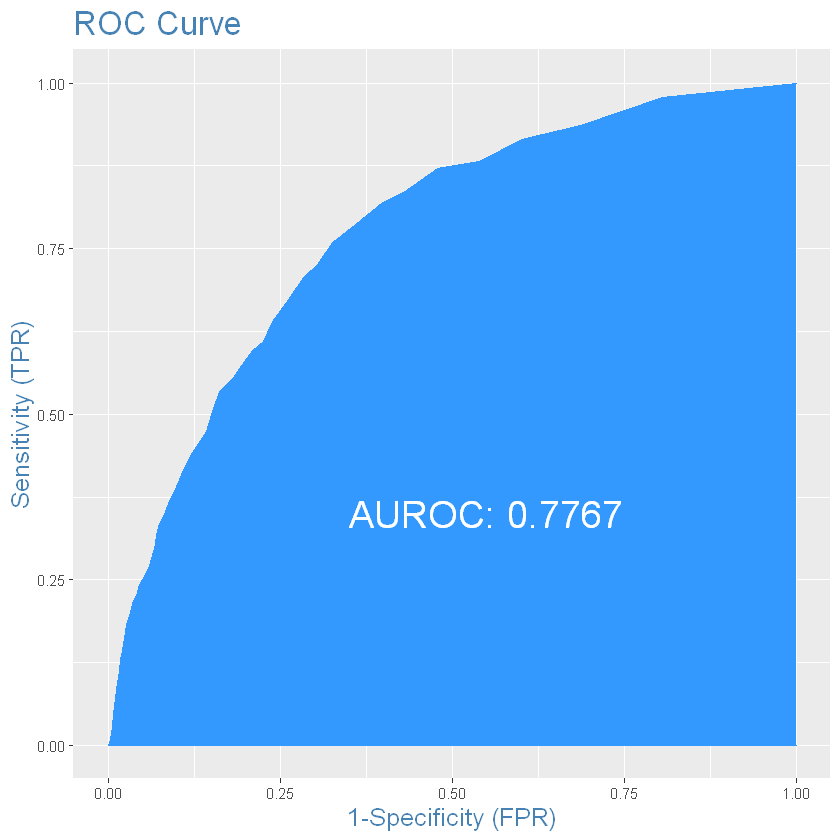

In [90]:
# Plotting ROC
plotROC(accepts_test$Default_45, pred$data$prob.1)

In [92]:
# Computing sensitivity
sensitivity(accepts_test$Default_45, pred$data$prob.1, threshold = cutoff1)

# Computing specificity
specificity(accepts_test$Default_45, pred$data$prob.1, threshold = cutoff1)

[1] 0.4464789

[1] 0.8748925

In [93]:
# Calculating Confusion Matrix

confusionMatrix(accepts_test$Default_45, pred$data$prob.1, threshold = cutoff1)
# The columns are actuals, while rows are predicteds

,0,1
,<int>,<int>
0,2035,393
1,291,317
